# Collapsing Things in netCDF4
# May 19, 2017

In [3]:
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib inline 
from salishsea_tools import nc_tools, diagnosis_tools 
import glob

In [4]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')    

test_u = glob.glob('/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h*U*')
test_v = glob.glob('/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h*V*')
test_w = glob.glob('/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h*W*')   

In [5]:
cv = diagnosis_tools.pcourantv(test_v, mesh_mask)
print("cv")
cw = diagnosis_tools.pcourantw(test_w, mesh_mask)
print("cw")

KeyboardInterrupt: 

In [23]:
def pcourantu(files,meshmask):
    """Given a list of U files and a mask mask, returns an array with the unscaled Counrant numbers.
    
    :arg files: list of U files
    
    :arg meshmask: mesh mask 
    :type mashmask: :py:class:'netCDF4.Dataset'
    
    :returns: Numpy MaskedArray with unscaled Courant numbers.
    :rtype: :py:class: 'numpy.ma.core.MaskedArray'
    """
    
    ubdx = np.zeros((40,898,398))
    delta_x = meshmask['e1u']
    for file in files:
        for n in range(0,24):
            u = np.abs(file['vozocrtx'][n,:,:,:] / delta_x)
            ubdx = np.maximum(u,ubdx)     #taking maximum over time
    new_u = np.zeros((898,398))
    for m in range(0,40):
        u = ubdx[m,:,:]
        new_u = np.maximum(u,new_u)    #taking maximum over depth
    
    return new_u

In [6]:
def pcourantu(files,meshmask):
    """Given a list of U filenames and a mesh mask, returns an array with the unscaled Courant numbers.
    
    :arg files: list of U filenames
    
    :arg meshmask: mesh mask 
    :type meshmask: :py:class:'netCDF4.Dataset'
    
    :returns: Numpy MaskedArray with unscaled Courant numbers.
    :rtype: :py:class: 'numpy.ma.core.MaskedArray'
    """
    
    delta_x = meshmask['e1u']
    with nc_tools.scDataset(files) as f:   #merging files
        nt,nz,ny,nx = f.variables['vozocrtx'].shape
        ubdx = np.zeros((nz,ny,nx))
        for n in range (nt):
            u = np.abs(f.variables['vozocrtx'][n,:,:,:] / delta_x)
            ubdx = np.maximum(u,ubdx)    #taking maximum over time
        new_u = np.zeros((ny,nx))
        for m in range(0,nz):
            u = ubdx[m,:,:]
            new_u = np.maximum(u,new_u)  #taking maximum over deptht
            
    return new_u

In [5]:
from salishsea_tools import diagnosis_tools

In [13]:
test_u

['/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141225-20141225.nc',
 '/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141223-20141223.nc',
 '/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141222-20141222.nc',
 '/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141220-20141220.nc',
 '/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141221-20141221.nc',
 '/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141224-20141224.nc',
 '/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141218-20141218.nc',
 '/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141219-20141219.nc']

In [15]:
u_stuff = diagnosis_tools.pcourantu(test_u,mesh_mask)

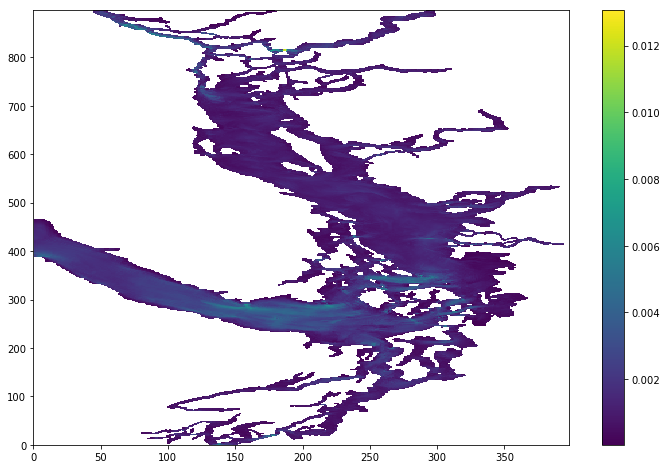

In [19]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
mesh = ax.pcolormesh(u_stuff)
fig.colorbar(mesh)
viz_to

In [59]:
def pcourantu_new(files,meshmask):
    """Given a list of U files and a mask mask, returns an array with the unscaled Counrant numbers.
    
    :arg files: list of U files
    
    :arg meshmask: mesh mask 
    :type mashmask: :py:class:'netCDF4.Dataset'
    
    :returns: Numpy MaskedArray with unscaled Courant numbers.
    :rtype: :py:class: 'numpy.ma.core.MaskedArray'
    """
    
    ubdx = np.zeros((40,898,398))
    delta_x = meshmask['e1u']
    with nc_tools.scDataset(files) as f:
        nt,nz,ny,nx = f.variables['vozocrtx'].shape
        for n in range (nt):
            u = np.abs(f['vozocrtx'][n,:,:,:] / delta_x)
            ubdx = np.maximum(u,ubdx)     #taking maximum over time
    new_u = np.zeros((898,398))
    for m in range(0,40):
        u = ubdx[m,:,:]
        new_u = np.maximum(u,new_u)    #taking maximum over depth
    
    return new_u

In [60]:
pcourantu_new(p_files,mesh_mask)

TypeError: 'scDataset' object is not subscriptable

In [24]:
pcourantu(u_files,mesh_mask)

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [0.0 0.0 0.0 ..., -- -- --]
 [0.0 0.0 0.0 ..., -- -- --]
 [0.0 0.0 0.0 ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]],
       fill_value = 1e+20)

In [53]:
day1u['vozocrtx']

<class 'netCDF4._netCDF4.Variable'>
float32 vozocrtx(time_counter, depthu, y, x)
    standard_name: sea_water_x_velocity
    long_name: ocean current along i-axis
    units: m/s
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 h
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered depthu nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (24, 40, 898, 398)
filling on

In [55]:
def pcourantv(files,meshmask):
    """Given a list of V files and a mesh mask, returns an array with the unscaled Courant numbers.
    
    :arg files: list of U files
    
    :arg meshmask: mesh mask 
    :type mashmask: :py:class:'netCDF4.Dataset'
    
    :returns: Numpy MaskedArray with unscaled Courant numbers.
    :rtype: :py:class: 'numpy.ma.core.MaskedArray' 
    """

    vbdx = np.zeros((40,898,398))
    delta_y = meshmask['e2v']
    for file in files:
        for n in range(0,24):
            v = np.abs(file['vomecrty'][n,:,:,:] / delta_y)
            vbdx = np.maximum(v,vbdx)   #taking maximum over time

    new_v = np.zeros((898,398))
    for m in range(0,40):
        v = vbdx[m,:,:]
        new_v = np.maximum(v,new_v)  #taking maximum over depth

    return new_v

In [56]:
pcourantv(v_files,mesh_mask)

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [0.0 0.0 0.0 ..., -- -- --]
 [0.0 0.0 0.0 ..., -- -- --]
 [0.0 0.0 0.0 ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]],
       fill_value = 1e+20)

In [61]:
def pcounrantw(files,meshmask):
    """Given a list of W files and a mesh mask, returns an array with the unscaled Courant numbers.
    
    :arg files: list of U files
    
    :arg meshmask: mesh mask 
    :type mashmask: :py:class:'netCDF4.Dataset'
    
    :returns: Numpy MaskedArray with unscaled Courant numbers.
    :rtype: :py:class: 'numpy.ma.core.MaskedArray'
    """

    wbdx = np.zeros((40,898,398))
    delta_z = meshmask['e3w_1d']
    new_z1 = np.expand_dims(delta_z[:],axis=2)
    new_z2 = np.swapaxes(new_z,0,1)
    ones = np.ones((40,898,398))
    new_z3 = ones*new_z2
    
    for file in files:
        for n in range(0,24):
            w = np.abs(file['vovecrtz'][n,:,:,:] / new_z3)   
            wbdx = np.maximum(w,wbdx)   #taking maximum over time

    new_w = np.zeros((898,398))
    for m in range(0,40):
        w = wbdx[m,:,:]
        new_w = np.maximum(w,new_w)  #taking maximum over depth
    
    return new_w

In [62]:
pcounrantw(w_files,mesh_mask)

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [0.0 0.0 0.0 ..., -- -- --]
 [0.0 0.0 0.0 ..., -- -- --]
 [0.0 0.0 0.0 ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]],
       fill_value = 1e+20)

In [49]:
p_files = ['/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141218-20141218.nc',
           '/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141219-20141219.nc']
with nc_tools.scDataset(p_files) as f:
    nt,nz,ny,nx = f.variables['vozocrtx'].shape
    for t in range (nt):
        

48


In [ ]:
'/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141218-20141218.nc'